### Exemplo de Clusterização: K-Means

---



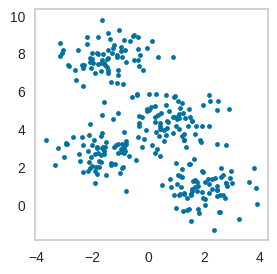

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Gerando dados de exemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
plt.figure(figsize=(3,3))
plt.plot(X[:,0], X[:,1], ls='', marker='.')
plt.grid()

In [136]:
# Aplicando o algoritmo K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


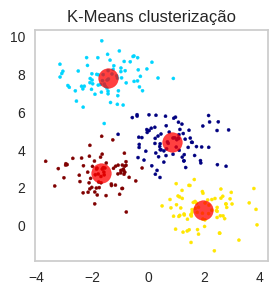

In [137]:
# Plotando os pontos e as áreas clusterizadas
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='jet')

# Plotando os centros dos clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)

plt.title('K-Means clusterização')
plt.grid()
plt.show()

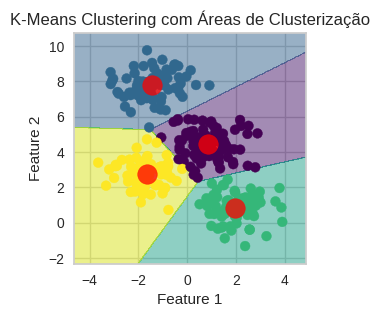

In [138]:
# Definindo a grade para o gráfico de contorno
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predição dos clusters para cada ponto na grade
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado do gráfico de contorno
Z = Z.reshape(xx.shape)
plt.figure(figsize=(3, 3))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')

# Plotando os pontos de dados
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plotando os centros dos clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering com Áreas de Clusterização')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Regra do cotovelo
___

In [139]:
# Aplicando o algoritmo K-Means
inercia_list = []
k_testeds = np.arange(2,21)
for i in k_testeds:
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(X)
  inercia_list.append(kmeans.inertia_)

In [140]:
def calcular_distancias(all_x, all_y):
  """ Aplicação da equação da reta e calculo de distancia """
  m = (all_y[-1] - all_y[0])/(all_x[-1] - all_x[0])
  dists = []
  for i in range(len(all_x)):
    y = all_y[0] + m*(all_x[i]-all_x[0])
    dists.append(y-all_y[i])
  return dists

In [141]:
dist_list = calcular_distancias(k_testeds, inercia_list)
best_index = np.argmax(dist_list)
best_k = k_testeds[best_index]
best_inercia1 = inercia_list[best_index]
best_inercia2 = dist_list[best_index]+inercia_list[best_index]

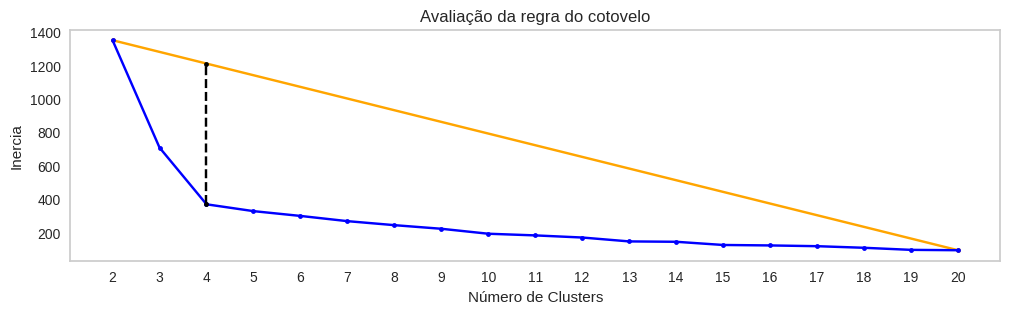

In [142]:
reta_x = [k_testeds[0], k_testeds[-1]]
reta_y = [inercia_list[0], inercia_list[-1]]

plt.figure(figsize=(12,3))
plt.ylabel("Inercia")
plt.xlabel("Número de Clusters")
plt.title("Avaliação da regra do cotovelo")
plt.plot(reta_x, reta_y, marker='.', color='orange')
plt.plot(k_testeds, inercia_list, marker='.', color='blue')
plt.plot([best_k,best_k], [best_inercia1, best_inercia2], ls='--', color='black', marker='.')
plt.xticks([i for i in range(2,21)])
plt.grid()



### Regra da Silhueta
___

É outra forma de decidir qual o número ideal de clusters. Ele é baseado na distância dos pontos entre seu próprio cluster e em relação ao cluster vizinho mais próximo. Varia de [-1,1] a qual valores próximos de 1 indicam boa cluesterização e próximos de -1 má clusterização.

In [143]:
silhueta_list = []
for i in k_testeds:
  kmeans = KMeans(n_clusters=i, n_init='auto')
  silhueta_list.append(silhouette_score(X, kmeans.fit_predict(X)))


In [144]:
y_best = np.max(silhueta_list)
x_best = k_testeds[np.argmax(silhueta_list)]

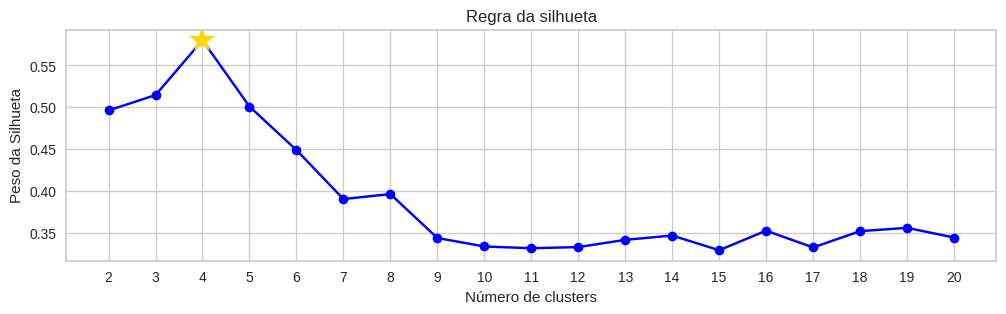

In [145]:
plt.figure(figsize=(12,3))
plt.xlabel("Número de clusters")
plt.ylabel("Peso da Silhueta")
plt.title("Regra da silhueta")
plt.plot(k_testeds, silhueta_list, marker='o', color='blue')
plt.plot(x_best, y_best, color='gold', marker='*', markersize=20)
plt.xticks([i for i in range(2,21)])
plt.grid(True)


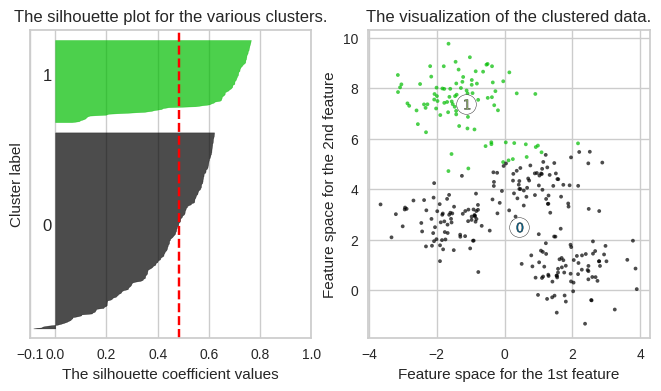

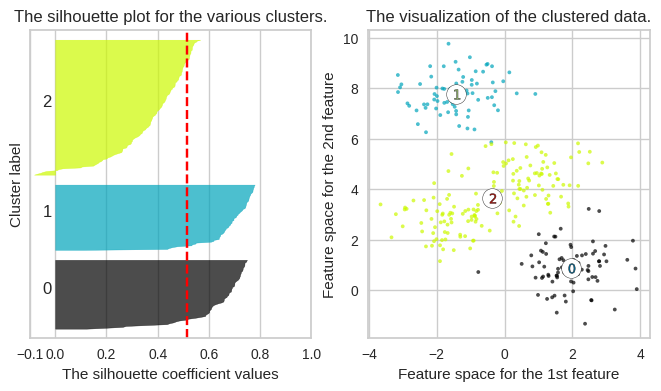

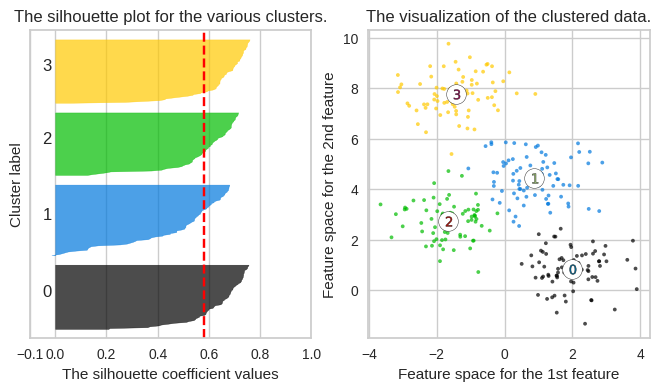

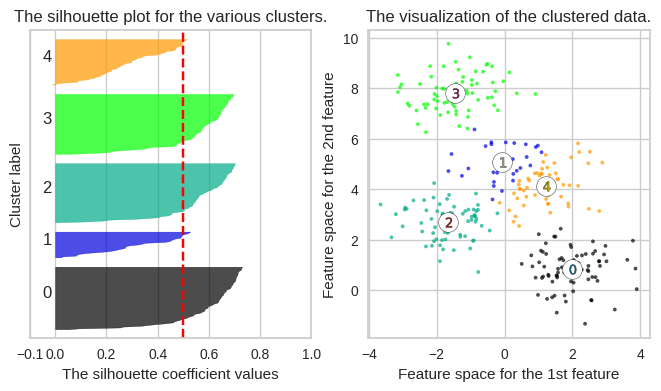

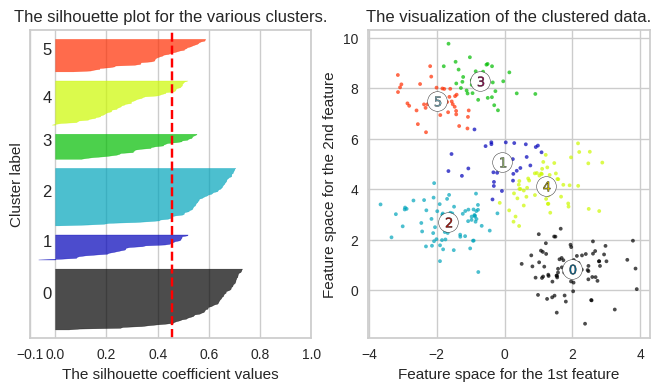

In [149]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(8, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
